In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
from sklearn.metrics import mean_squared_error

import pylab
pylab.rcParams['figure.figsize'] = (18, 8)
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams.update({'font.size': 18})

import pandas as pd
# import seaborn as sns
import numpy as np

import sklearn

In [7]:
data = pd.read_csv('./train.csv')

Rough split of categorical vs numerical variables

In [8]:
categorical = [ key for key in data.keys() if data.dtypes[key] == np.dtype('O')]
numeric = [ key for key in data.keys() if data.dtypes[key] != np.dtype('O')]

### How many nan do we have in the numerical feature?

In [11]:
for feat in numeric:
    percent = data[feat].isnull().sum()/len(data[feat])
    print('feat',feat,'has',percent*100,'% of nan')

feat Id has 0.0 % of nan
feat MSSubClass has 0.0 % of nan
feat LotFrontage has 17.7397260274 % of nan
feat LotArea has 0.0 % of nan
feat OverallQual has 0.0 % of nan
feat OverallCond has 0.0 % of nan
feat YearBuilt has 0.0 % of nan
feat YearRemodAdd has 0.0 % of nan
feat MasVnrArea has 0.547945205479 % of nan
feat BsmtFinSF1 has 0.0 % of nan
feat BsmtFinSF2 has 0.0 % of nan
feat BsmtUnfSF has 0.0 % of nan
feat TotalBsmtSF has 0.0 % of nan
feat 1stFlrSF has 0.0 % of nan
feat 2ndFlrSF has 0.0 % of nan
feat LowQualFinSF has 0.0 % of nan
feat GrLivArea has 0.0 % of nan
feat BsmtFullBath has 0.0 % of nan
feat BsmtHalfBath has 0.0 % of nan
feat FullBath has 0.0 % of nan
feat HalfBath has 0.0 % of nan
feat BedroomAbvGr has 0.0 % of nan
feat KitchenAbvGr has 0.0 % of nan
feat TotRmsAbvGrd has 0.0 % of nan
feat Fireplaces has 0.0 % of nan
feat GarageYrBlt has 5.54794520548 % of nan
feat GarageCars has 0.0 % of nan
feat GarageArea has 0.0 % of nan
feat WoodDeckSF has 0.0 % of nan
feat OpenPorchS

The only problematic one is LotFrontage, if it is a relevant feature we might want to do better than fillna with median

- - -

## Categorical

In [10]:
# correct naive expectations
actual_categoric = ['MSSubClass']
numeric = list(set(numeric) - set(actual_categoric))
categorical = list(set(categorical).union(set(actual_categoric)))

In [14]:
from sklearn.pipeline import BaseEstimator, TransformerMixin

df = pd.read_csv('./train.csv')
categorical = [ key for key in data.keys() if data.dtypes[key] == np.dtype('O')]
numeric = [ key for key in data.keys() if data.dtypes[key] != np.dtype('O')]
# correct naive expectations
actual_categoric = ['MSSubClass']
numeric = list(set(numeric) - set(actual_categoric))
categorical = list(set(categorical).union(set(actual_categoric)))

for cat in categorical:
    df[cat] = df[cat].astype('category') 
_test_categories = {key : df[key].cat.categories for key in categorical}


class categorical_extractor(BaseEstimator,TransformerMixin):
    """Takes in dataframe, extracts """

    def __init__(self):
        pass

    def find_categorical(self, df):
        """Helper code to compute average word length of a name"""
#         print(type(df),df.ndim)
        categorical = [ key for key in df.keys() if df.dtypes[key] == np.dtype('O')]
        numeric = [ key for key in df.keys() if df.dtypes[key] != np.dtype('O')]
        # correct naive expectations
        actual_categoric = ['MSSubClass']
        numeric = list(set(numeric) - set(actual_categoric))
        categorical = list(set(categorical).union(set(actual_categoric)))
        return  categorical
        

    def transform(self, df):
        """The workhorse of this feature extractor"""
        categorical = self.find_categorical(df)
        _df = df.copy()
        for cat in categorical:
            _df[cat] = pd.Categorical(_df[cat] , categories= _test_categories[cat]) 
            
        return pd.get_dummies(_df[categorical]).as_matrix()
#         return pd.get_dummies(_df[categorical])


    
    def fit(self, X, y=None):
        """Returns `self` unless something different happens in train and test"""
#         self.index_ = X.index
#         self.columns_ = X.columns
#         self.cat_columns_ = X.select_dtypes(include=['object']).columns
#         self.non_cat_columns_ = X.columns.drop(self.cat_columns_)
#         self.cat_map_ = {col: X[col].name for col in self.cat_columns_}
#         left = len(self.non_cat_columns_)
#         self.cat_blocks_ = {}
# #         for col in self.cat_columns_:
# #             right = left + len(X[col].cat.categories)
# #             self.cat_blocks_[col], left = slice(left, right), right
        return self

In [12]:
enc= categorical_extractor()

In [15]:
feat = data.drop('SalePrice',1)

In [16]:
feat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [17]:
A =enc.transform(feat)

In [19]:
target = np.asarray(np.log(data.SalePrice))

In [20]:
X = enc.transform(feat)

In [21]:
X

array([[ 0.,  1.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [22]:
from sklearn.linear_model import Ridge

In [23]:
clf = Ridge(alpha=1.0)

In [24]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error

<function sklearn.metrics.regression.mean_squared_error>

In [26]:
rfecv = RFECV(estimator=clf, step=1, cv=5,scoring='mean_squared_error')

In [27]:
rfecv.fit(X,target)

RFECV(cv=5,
   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)

Optimal number of features : 214


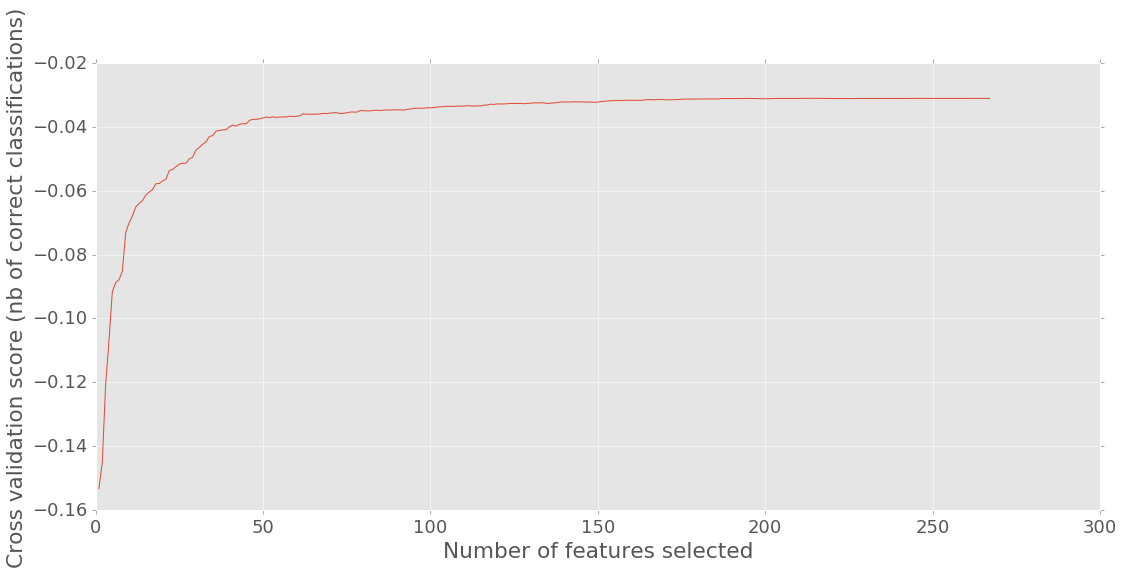

In [28]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [43]:
selector = RFE(clf, 4, step=1)

In [27]:
selector.fit(X,target)

RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001),
  estimator_params={}, n_features_to_select=4, step=1, verbose=0)

In [28]:
selector.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Quick test fit with Ridge

In [29]:
clf.fit(X, target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [30]:
clf.score(X,target)

0.87265874402185506

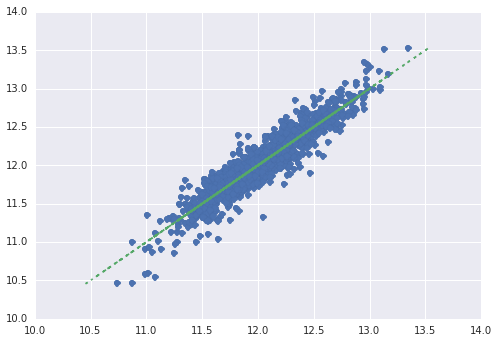

In [31]:
plt.plot(clf.predict(X),target,'o')\
plt.plot(target,target,'-.')

The most important categories are:

In [33]:
pd.get_dummies(feat[categorical]).columns[selector.support_]

NameError: name 'selector' is not defined

# Numerical

In [13]:
from sklearn.preprocessing import StandardScaler

class numerical_extractor( BaseEstimator, TransformerMixin):
    """Takes in dataframe, extracts """

    def __init__(self):
        pass

    def find_numerical(self, df):
        """Helper code to compute average word length of a name"""

        categorical = [ key for key in df.keys() if df.dtypes[key] == np.dtype('O')]
        numeric = [ key for key in df.keys() if df.dtypes[key] != np.dtype('O')]
        # correct naive expectations
        actual_categoric = ['MSSubClass']
        numeric = list(set(numeric) - set(actual_categoric))
        return  numeric
        


    def transform(self, df):
        """The workhorse of this feature extractor"""
        numerical = self.find_numerical(df)
        #         filna with median
        df_ = df.copy()
        for key in numerical:
            df_[key].fillna(df_[key].median(),inplace=True)
        return  StandardScaler().fit_transform(np.asarray(df_[numerical]))
    

    
    def fit(self, X, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self

In [35]:
num_enc= numerical_extractor()

In [36]:
B =num_enc.transform(feat)

In [37]:
clf.fit(X,target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
clf.score(X,target)

0.87885356162163397

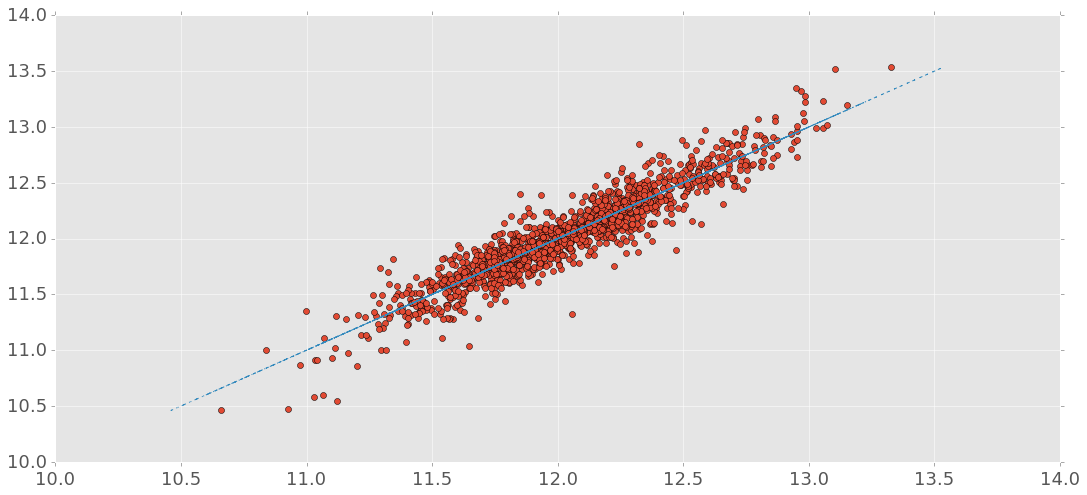

In [39]:
plt.plot(clf.predict(X),target,'o')
plt.plot(target,target,'-.')

In [40]:
rfecv.fit(X,target)

RFECV(cv=5,
   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)

Optimal number of features : 214


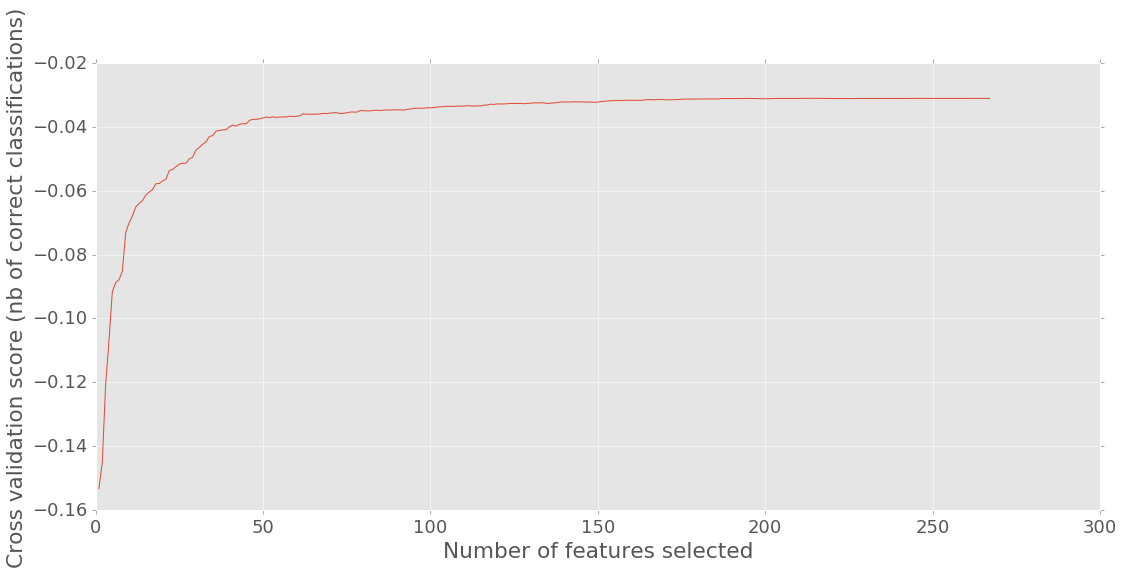

In [41]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [44]:
selector.fit(X,target)

RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
  estimator_params=None, n_features_to_select=4, step=1, verbose=0)

In [48]:
feat[[ key for key in X.keys() if X.dtypes[key] != np.dtype('O')]].columns[selector.support_]

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

it seems like the most expensive one follow some sense of a different law-market so maybe identify them is good

In [45]:
from sklearn.manifold import TSNE

In [46]:
tsne = TSNE(n_components=2, init='pca', random_state=0)

In [47]:
Y = tsne.fit_transform(X)

In [48]:
np.where(target>np.log(300000));

In [49]:
Y[np.where(target>np.log(300000)),0];

/software/python-3.4-2015q1-el6-x86_64/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


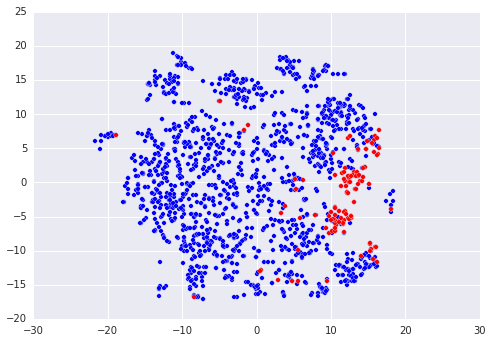

In [50]:
plt.scatter(Y[:,0],Y[:,1])
plt.scatter(Y[np.where(target>np.log(300000)),0],Y[np.where(target>np.log(300000)),1], c= 'r')

## Combine numerical and categorical features

In [51]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [52]:
combined_features = FeatureUnion([("categ", categorical_extractor() ), ("numeric", numerical_extractor())])

In [53]:
ridge = Pipeline(steps=[
    ("feat", combined_features ),
    ('clf', sklearn.linear_model.RidgeCV())  # classifier
])

In [54]:
rf = RFECV(estimator=sklearn.linear_model.RidgeCV(), 
                              step=1, cv=5,scoring='mean_squared_error') 

In [55]:
ridge.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('clf', RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False))])

Optimal number of features : 17


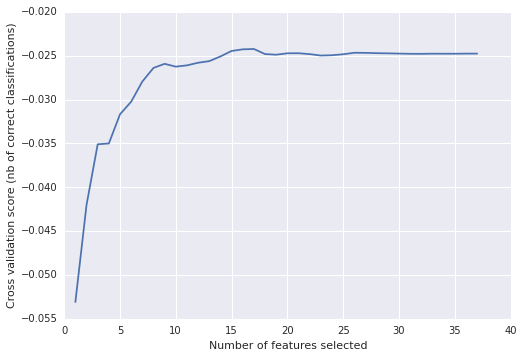

In [265]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [266]:
ridge = Pipeline(steps=[
    ("feat", combined_features ),
    ('select_feat', RFECV(estimator=sklearn.linear_model.Ridge(alpha=0.1))), 
    ('clf', sklearn.linear_model.RidgeCV())  # classifier
])

In [269]:
ridge.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('select_feat', RFECV(cv=None,
   estimator=Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False,...e=None, loss_func=None, normalize=False, score_func=None,
    scoring=None, store_cv_values=False))])

In [270]:
ridge.score(feat,target)

0.91122085141460718

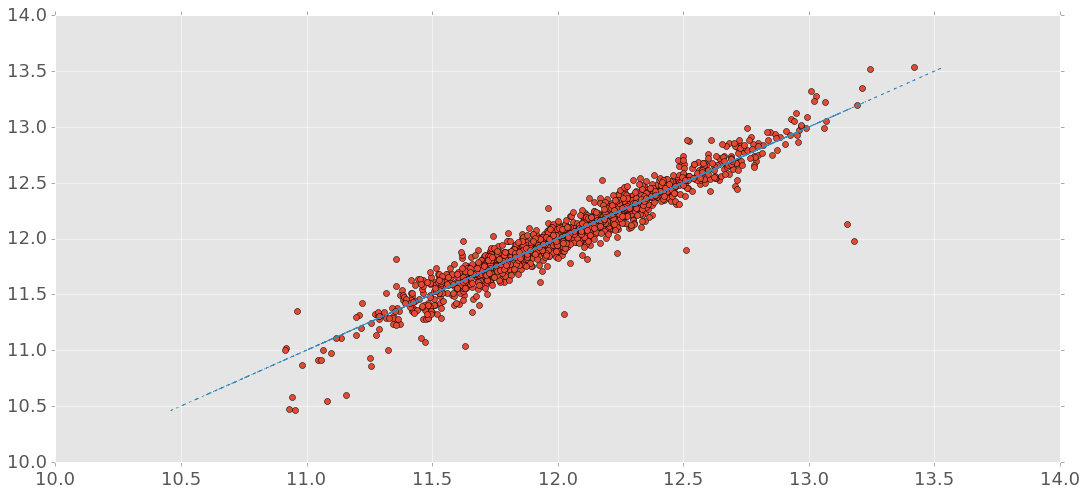

## Support vector machines

In [56]:
sklearn.svm.SVR(kernel='linear')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
SVR_lin = Pipeline(steps=[
    ("feat", combined_features ),
    ('clf', sklearn.svm.SVR(kernel='linear'))  # classifier
])

In [58]:
SVR_lin.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('clf', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [272]:
SVR_lin.score(feat,target)

0.92997827401037103

# LASSO

In [61]:
from sklearn import linear_model
# from  sklearn.feature_selection import

In [62]:
lasso = Pipeline(steps=[
    ("feat", combined_features ),
#     ('select_feat', RFECV(estimator=sklearn.linear_model.LassoCV(alphas=np.logspace(np.log(0.0001),np.log(1.5),200), n_jobs=-1 ), 
#                               step=5, cv=5,scoring='mean_squared_error')  ),
#     ('clf', sklearn.linear_model.LassoCV(n_alphas=1500) )  # classifier
    ('clf',sklearn.linear_model.LassoCV(alphas=np.logspace(np.log(0.00005),np.log(2.5),400), n_jobs = -1 ) )  # classifier


])

#  sklearn.linear_model.LassoCV(alphas=np.logspace(0.0005,1,20)

In [63]:
lasso.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('clf', LassoCV(alphas=array([  1.24886e-10,   1.32932e-10, ...,   7.74771e+00,   8.24690e+00]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=-1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [64]:
lasso.score(feat,target)

0.93231527257994562

In [65]:
mean_squared_error(lasso.predict(feat),target) 

0.01079249941565472

### Elastic net

In [70]:
elastic_net = Pipeline(steps=[
    ("feat", combined_features ),
    ('select_feat', RFECV(estimator=linear_model.ElasticNetCV(n_alphas=20), 
                              step=3, cv=3,scoring='mean_squared_error')  ),
    ('clf', linear_model.ElasticNetCV(n_alphas=1500) )  # classifier
])

In [71]:
elastic_net.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('select_feat', RFECV(cv=3,
   estimator=ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l...ive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0))])

In [72]:
elastic_net.score(feat,target)

0.92951920316899617

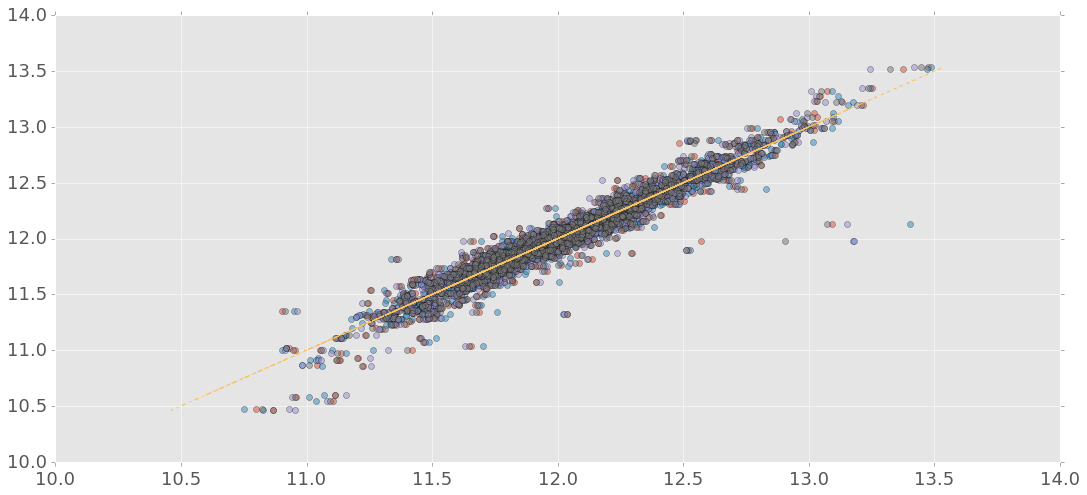

In [73]:
plt.plot(lasso.predict(feat),target,'o',alpha=0.5)
plt.plot(SVR_lin.predict(feat),target,'o',alpha=0.5)
plt.plot(ridge.predict(feat),target,'o',alpha=0.5)
plt.plot(elastic_net.predict(feat),target,'o',alpha=0.5)



plt.plot(target,target,'-.')

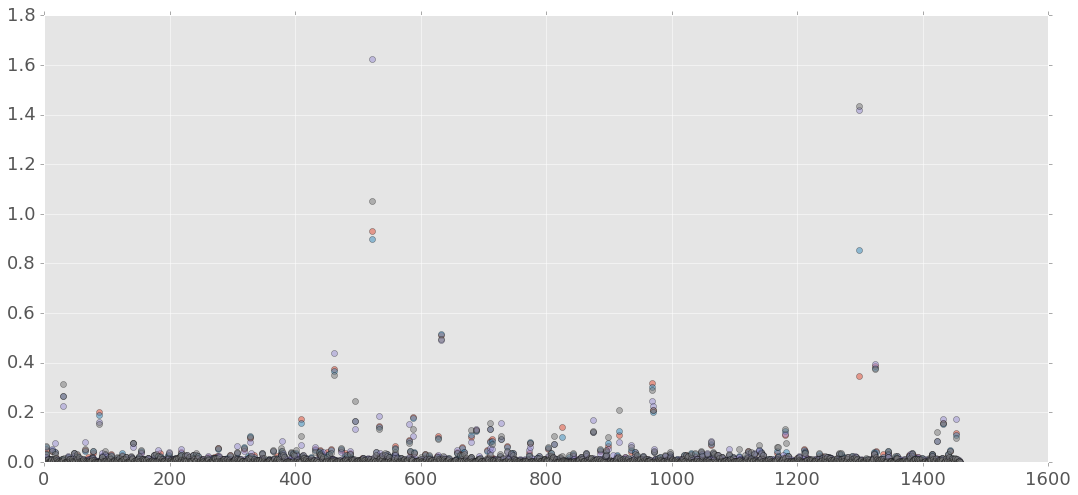

In [75]:
plt.plot((lasso.predict(feat)-target)**2,'o',alpha=0.5)
plt.plot((elastic_net.predict(feat)-target)**2,'o',alpha=0.5)
plt.plot((SVR_lin.predict(feat)-target)**2,'o',alpha=0.5)
plt.plot((ridge.predict(feat)-target)**2,'o',alpha=0.5)



## Decision tree

In [76]:
from sklearn.tree import DecisionTreeRegressor


In [77]:
clf = DecisionTreeRegressor(max_depth=6)

In [78]:
transf= Pipeline(steps=[
    ("feat", combined_features ),
#     ('clf', DecisionTreeRegressor(max_depth=6) )  # classifier
])

In [79]:
tree= Pipeline(steps=[
    ("feat", combined_features ),
    ('clf', DecisionTreeRegressor(max_depth=6) )  # classifier
])

In [80]:
tree.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('clf', DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))])

In [81]:
tree.score(feat,target)

0.88677576518633949

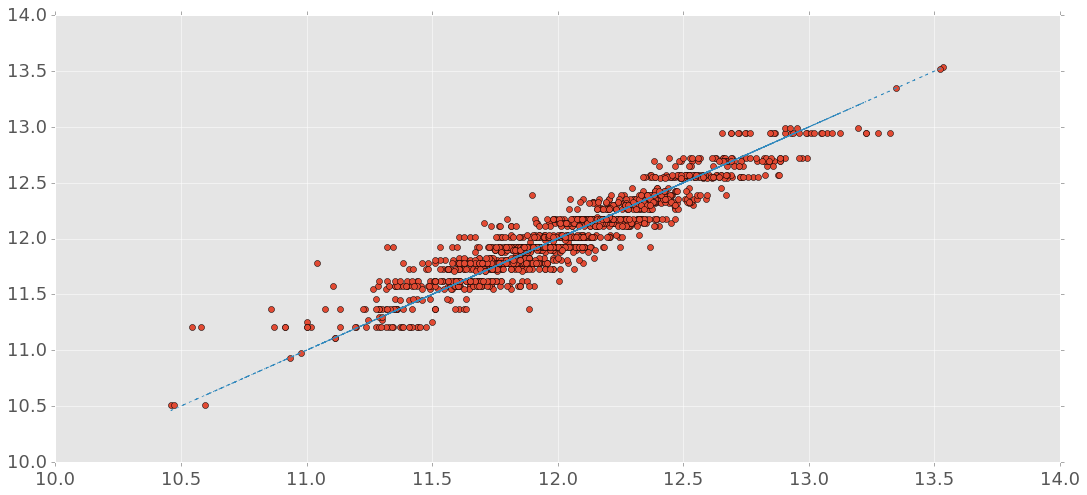

In [82]:
plt.plot(target,tree.predict(feat),'o')
plt.plot(target,target,'-.')

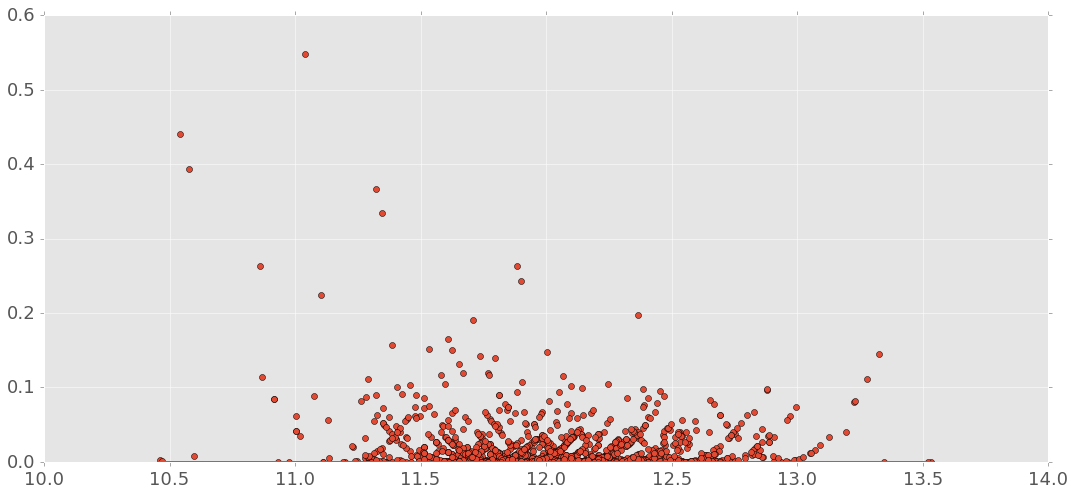

In [83]:
plt.plot(target,(tree.predict(feat)-target)**2,'o')
plt.plot(target, 0.*target,'-')

In [84]:
from IPython.display import Image
from sklearn.externals.six import StringIO  


In [85]:
clf.fit(transf.transform(feat),target)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

## Bayesian regressor

In [88]:
baysian= Pipeline(steps=[
    ("feat", combined_features ),
    ('clf', linear_model.BayesianRidge(n_iter=4000) )  # classifier
])

In [89]:
baysian.fit(feat,target)


Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('clf', BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=4000,
       normalize=False, tol=0.001, verbose=False))])

In [90]:
baysian.score(feat,target)

0.9238048436080315

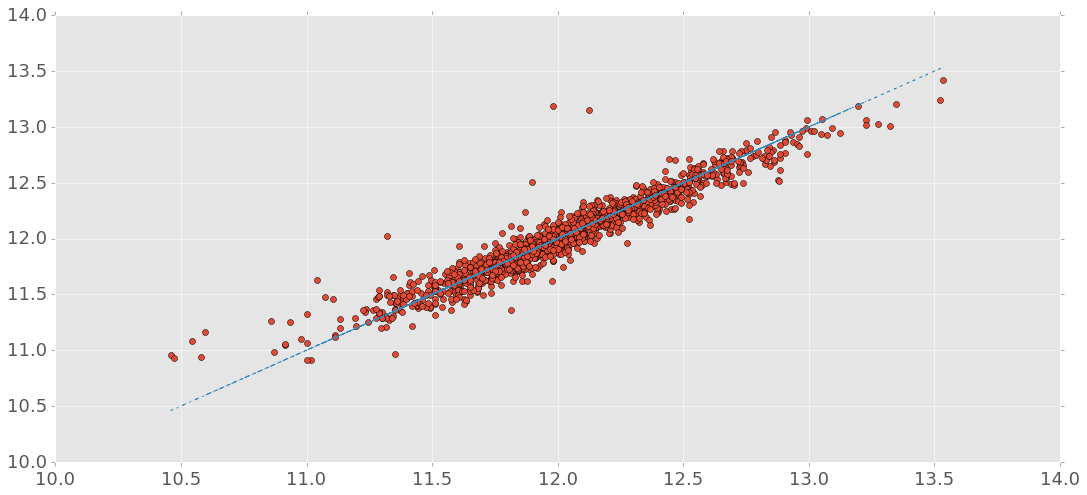

In [91]:
plt.plot(target,baysian.predict(feat),'o')
plt.plot(target,target,'-.')

### SGD regressor


In [92]:
SGD= Pipeline(steps=[
    ("feat", combined_features ),
    ('clf', linear_model.SGDRegressor() )  # classifier
])

In [93]:
SGD.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('clf', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False))])

In [94]:
SGD.score(feat,target)

0.36249982737057607

In [ ]:
plt.plot(SGD.predict(feat),target,'o')
plt.plot(target,target,'-.')

## AdaBoost

In [96]:
import sklearn.ensemble

In [97]:
ada_simple= Pipeline(steps=[
    ("feat", combined_features ),
    ('clf', sklearn.ensemble.AdaBoostRegressor(n_estimators=100) )  # classifier
])


In [98]:
ada_simple.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('clf', AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None))])

In [99]:
ada_simple.score(feat,target)

0.86021386208031336

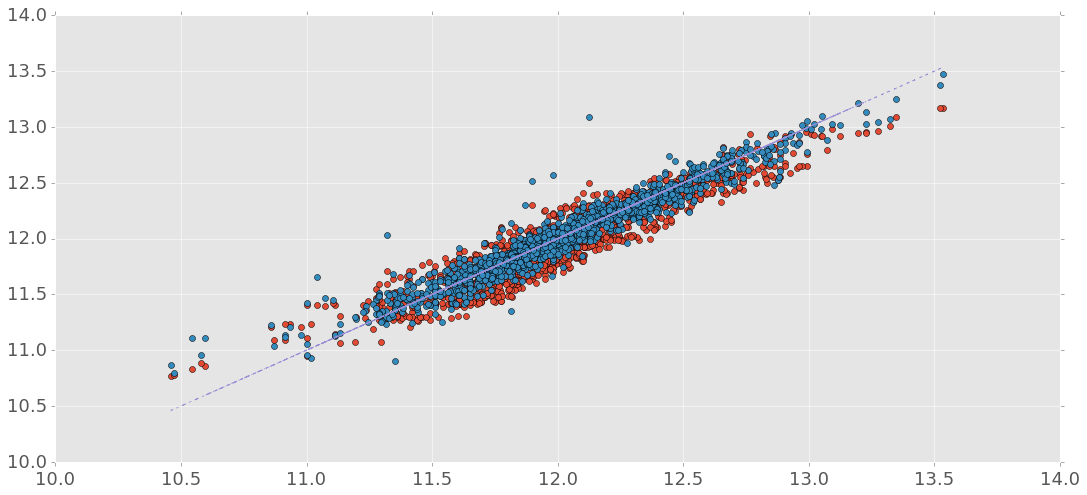

In [100]:
plt.plot(target,ada_simple.predict(feat),'o')
plt.plot(target,lasso.predict(feat),'o')
plt.plot(target,target,'-.')

- - - 

# TEST dataset

In [44]:
test = pd.read_csv('./test.csv')

In [48]:
combined_features = FeatureUnion([("categ", categorical_extractor()), ("numeric", numerical_extractor())])

In [58]:
ridge = Pipeline(steps=[
    ("feat", combined_features ),
    ('select_feat', RFECV(estimator=sklearn.linear_model.Ridge(alpha=0.1))), 
    ('clf', sklearn.linear_model.RidgeCV())  # classifier
])

In [59]:
ridge.fit(feat,target)

Pipeline(steps=[('feat', FeatureUnion(n_jobs=1,
       transformer_list=[('categ', categorical_extractor()), ('numeric', numerical_extractor())],
       transformer_weights=None)), ('select_feat', RFECV(cv=None,
   estimator=Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False,...e=None, loss_func=None, normalize=False, score_func=None,
    scoring=None, store_cv_values=False))])

In [60]:
test_pred = ridge.predict(test)

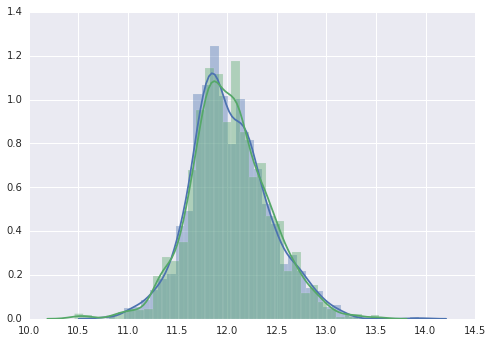

In [61]:
sns.distplot(test_pred)
sns.distplot(target)

In [125]:
# Prepare submission
test_pred = np.exp(lasso.predict(test))
solution = pd.DataFrame({"id":test.Id, "SalePrice":test_pred})
solution.to_csv("lasso_sol.csv", index = False)